# Sierpinski's Triangle

One of the very first pieces of code I wrote was a <a href="https://en.wikipedia.org/wiki/TI-BASIC" target="_blank">TI-BASIC</a> code to used generate <a href="https://en.wikipedia.org/wiki/Sierpiński_triangle" target="_blank">Sierpinski's triangle</a>. It was this piece of code which led me towards programming as well as theoretical physics. In this post we explore how to generate Sierpinski's triangle in python!

Sierpinski's triangle is generated iteratively using 3 different transformations as follows. Starting with a large unit triangle, the first transformation is to simply scale the triangle's base and height by half. This transformation occurs 1/3 of the time. The second transformation is to scale the triangle's base and height by half, and moving the scaled triangle length-wise by 1/4 and height-wise by 0.25 × tan(π/3) = √3 / 4. This transformation also occurs 1/3 of the time. The third transformation is to scale the triangle's base and height by half, and moving the scaled triangle length-wise by 1/2. Once again this transformation occurs 1/3 of the time.

The python code which implements this set of transformations iteratively is as follows.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sierpins(N):
    """
    This function generates the sierpinski triangle fractal
    
    Input
    -----
    N: int
        number of points to generate
        
    Returns
    -------
    X: np.array
        np.array of points of the cantor box
    """    
    X = np.zeros([N + 1, 2])

    for k in range(N):
        r = np.random.random()
        if r <= 1.0 / 3.0:
            # Scale length and height by 0.5
            X[k + 1, 0] = 0.5 * X[k, 0]
            X[k + 1, 1] = 0.5 * X[k, 1]
        elif r <= 2.0 / 3.0:
            # Scale length and height by 0.5, and move
            # length-wise by 0.25 and height-wise by sqrt(3) / 4.0
            X[k + 1, 0] = 0.5 * X[k, 0] + 0.25
            X[k + 1, 1] = 0.5 * X[k, 1] + np.sqrt(3) / 4.0
        else:
            # Scale length and height by 0.5, and move
            # length-wise by 0.5
            X[k + 1, 0] = 0.5 * X[k, 0] + 0.5
            X[k + 1, 1] = 0.5 * X[k, 1]     
 
    return X[:,0], X[:,1]

Running the code with 1000000 iterations results in the following image below.

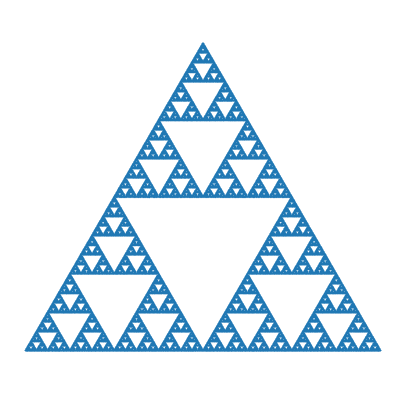

In [2]:
x, y = sierpins(1000000)
plt.figure(figsize = (7, 7))
plt.plot(x, y, '.', markersize = 0.2)
plt.axis('equal')
plt.axis('off')
plt.show()

As an addition, we also explore the Sierpinski's carpet fractal. This fractal is related to the Sierpinski's triangle fractal and can be generated using a very similar set of transformations as above. In this case, we start with a unit square, and apply 8 different transformations, each of which occurs with 1.0/8.0 probability. 

In [3]:
def sierpinski_carpet(N):
    """
    This function generates the Sierpinski carpet fractal.
    Note that the Sierpinski triangle fractal is a related
    but different fractal.
    
    Input
    -----
    N: int
        number of points to generate
        
    Returns
    -------
    X: np.array
        np.array of points of the cantor box
    """    
    X = np.zeros([N + 1, 2])

    for k in range(N):
        r = np.random.random()
        if r <= 1.0/8.0:
            # scale by 1/3
            X[k+1, 0] = 1.0/3.0 * X[k, 0]
            X[k+1, 1] = 1.0/3.0 * X[k, 1]
        elif r <= 2.0/8.0:
            # scale by 1/3 and translate along x by 1/3
            X[k+1, 0] = 1.0/3.0 * X[k, 0] + 1.0/3.0
            X[k+1, 1] = 1.0/3.0 * X[k, 1]
        elif r <= 3.0/8.0:
            # scale by 1/3 and translate along x by 2/3
            X[k+1, 0] = 1.0/3.0 * X[k, 0] + 2.0/3.0
            X[k+1, 1] = 1.0/3.0 * X[k, 1]
        elif r <= 4.0/8.0:
            # scale by 1/3 and translate along y by 1/3
            X[k+1, 0] = 1.0/3.0 * X[k, 0]
            X[k+1, 1] = 1.0/3.0 * X[k, 1] + 1.0/3.0
        elif r <= 5.0/8.0:
            # scale by 1/3 and translate along x by 2/3 and y by 1/3
            X[k+1, 0] = 1.0/3.0 * X[k, 0] + 2.0/3.0
            X[k+1, 1] = 1.0/3.0 * X[k, 1] + 1.0/3.0
        elif r <= 6.0/8.0:
            # scale by 1/3 and translate along y by 2/3
            X[k+1, 0] = 1.0/3.0 * X[k, 0] 
            X[k+1, 1] = 1.0/3.0 * X[k, 1] + 2.0/3.0
        elif r <= 7.0/8.0:
            # scale by 1/3 and translate along x by 1/3 and y by 2/3
            X[k+1, 0] = 1.0/3.0 * X[k, 0] + 1.0/3.0
            X[k+1, 1] = 1.0/3.0 * X[k, 1] + 2.0/3.0
        else:
            # scale by 1/3 and translate along x by 2/3 and y by 2/3
            X[k+1, 0] = 1.0/3.0 * X[k, 0] + 2.0/3.0
            X[k+1, 1] = 1.0/3.0 * X[k, 1] + 2.0/3.0

    return X[:,0], X[:,1]

Running the python code above results in the following image which looks similar to the Sierpinski's triangle image above!

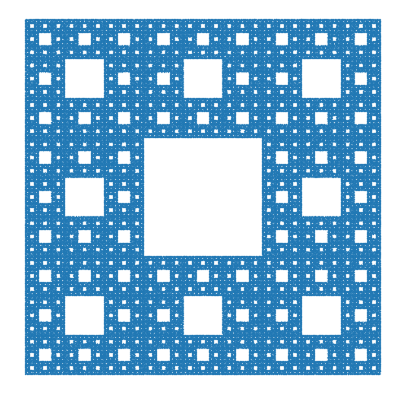

In [4]:
x, y = sierpinski_carpet(1000000)
plt.figure(figsize = (7, 7))
plt.plot(x, y, '.', markersize = 0.2)
plt.axis('equal')
plt.axis('off')
plt.show()